In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [73]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cPickle as pickle

from code.clusterize import *

In [59]:
df = pickle.load(open('featuresdf.pkl', 'rb'))
latlon = df[['lat', 'lon']]

In [42]:
%time cnum = cut2cluster('010406', 20)

CPU times: user 1min 16s, sys: 1.01 s, total: 1min 17s
Wall time: 1min 17s


In [48]:
cnum.shape

(7325,)

In [60]:
df = df.ix[cnum.index]

In [51]:
df.shape

(7325, 2)

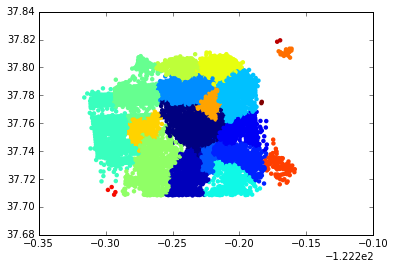

In [55]:
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)

In [103]:
%time cnum = cut2cluster('07', 8)

CPU times: user 1min 2s, sys: 926 ms, total: 1min 3s
Wall time: 1min 4s


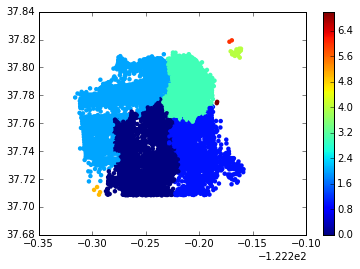

In [106]:
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)
plt.colorbar();

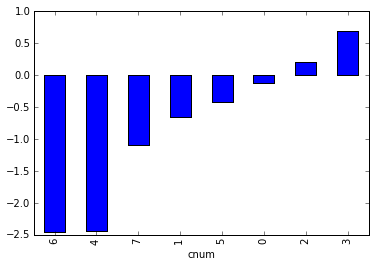

In [105]:
df['cnum'] = cnum
df.groupby('cnum').mean()['population'].sort_values().plot(kind='bar')

In [65]:
fn = 'results/CL' + '07' + '.csv'
cutdf = pd.read_csv(fn)

In [66]:
g = make_graph(cutdf)

In [71]:
featuredf = df.copy()
featuredf['cnum'] = cnum

In [96]:
ks, wcsses = elbow_plot(cutdf, pd.DataFrame(df.population))

2388 6
3150 7
3324 8
3377 9
3737 10
3853 11
4047 12
4328 13
4450 14
4533 15
4580 16
4827 17
4933 18
4990 19
5209 20
5235 21
5445 22
5567 23
5588 24
5637 25
5682 26
5704 27
5755 28
5789 29
5834 30


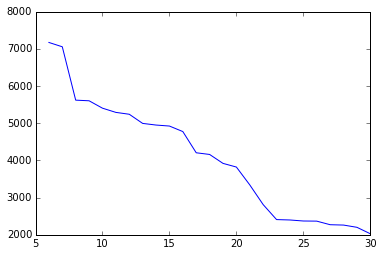

In [102]:
plt.plot(ks[1:], wcsses)

# 3-feature comparison

In [134]:
%time cnum1 = cut2cluster('000607', 17)

CPU times: user 1min 15s, sys: 1.39 s, total: 1min 17s
Wall time: 1min 17s


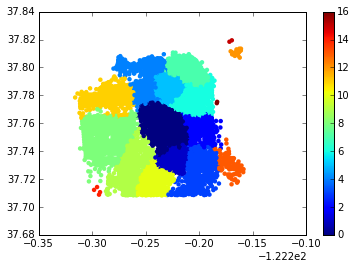

In [135]:
plt.scatter(df.lon, df.lat, c=cnum1, linewidths = 0)
plt.colorbar();

In [136]:
%time cnum2 = cut2cluster('010405', 17)

CPU times: user 1min 25s, sys: 1.32 s, total: 1min 26s
Wall time: 1min 27s


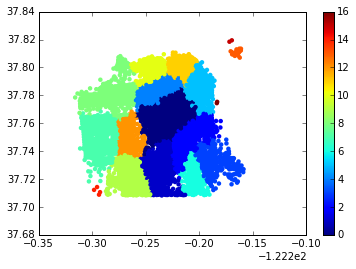

In [137]:
plt.scatter(df.lon, df.lat, c=cnum2, linewidths = 0)
plt.colorbar();

In [138]:
%time cnum3 = cut2cluster('010406', 17)

CPU times: user 1min 17s, sys: 1.63 s, total: 1min 19s
Wall time: 1min 20s


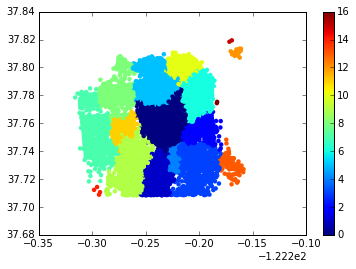

In [139]:
plt.scatter(df.lon, df.lat, c=cnum3, linewidths = 0)
plt.colorbar();

In [140]:
%time cnum4 = cut2cluster('00060708', 17)

CPU times: user 1min 13s, sys: 1.33 s, total: 1min 14s
Wall time: 1min 17s


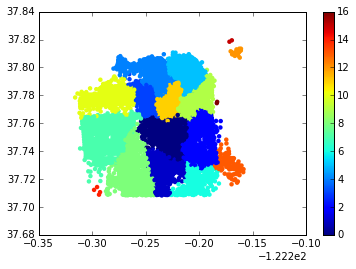

In [141]:
plt.scatter(df.lon, df.lat, c=cnum4, linewidths = 0)
plt.colorbar();

# elbow comparison

In [118]:
fnums = {0: 'taxable_value',
         1: 'grocery',
         2: 'restaurant',
         3: 'retail',
         4: 'ncrimes',
         5: 'sgnf',
         6: 'avg_hh_size',
         7: 'population',
         8: 'walkscore'}

In [119]:
flist = [[0,1,5,6,7,8],
         [0,6,7],
         [0,6,7,8],
         [1,4,5],
         [1,4,5,8],
         [1,4,6],
         [7]]

['taxable_value', 'grocery', 'sgnf', 'avg_hh_size', 'population', 'walkscore']
['taxable_value', 'avg_hh_size', 'population']
['taxable_value', 'avg_hh_size', 'population', 'walkscore']
['grocery', 'ncrimes', 'sgnf']
['grocery', 'ncrimes', 'sgnf', 'walkscore']
['grocery', 'ncrimes', 'avg_hh_size']
['population']


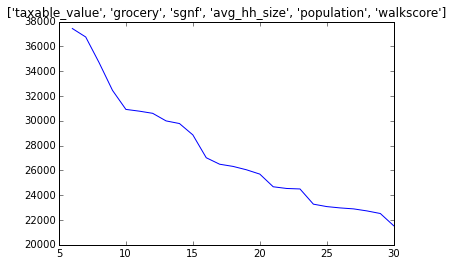

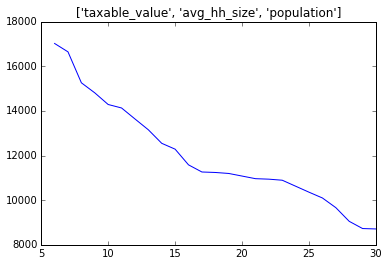

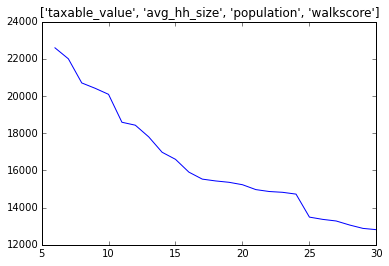

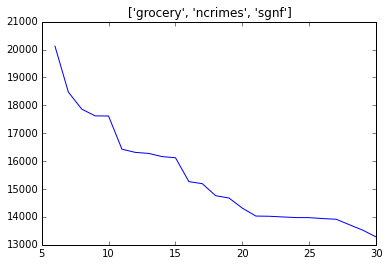

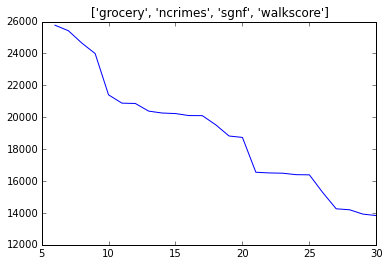

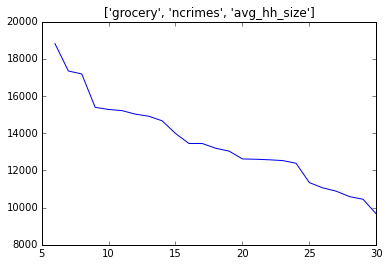

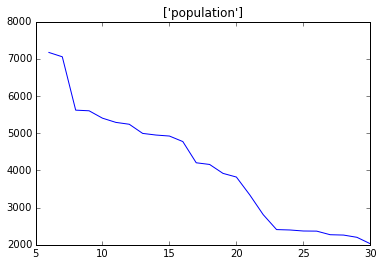

In [130]:
for features in flist:
    fnumber = '%02d' * len(features) % tuple(features)
    cutdf = pd.read_csv('results/CL' + fnumber + '.csv')
    fnames = [fnums[n] for n in features]
    print fnames
    ks, wcsses = elbow_plot(cutdf, df[fnames])
    plt.figure()
    plt.plot(ks, wcsses)
    plt.title(fnames)